In [ ]:
"""Visualize Embeddings"""
import os
import argparse
from typing import List

import matplotlib
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plot_embeddings(embeddings: List[np.ndarray], sort_type):
    """Plot transformed embedding vectors with predefined labels.

    Args:
        embed_arr_ls: a list of np.ndarray. Each np.ndarray is a matrix with embeddings corresponding to data examples.
        names: a list of str. The names of the data sources. The length of this list should be the same as the length of embed_arr_ls.

    Returns:
        None
    """
    embed_arr_ls = np.array(embeddings)
    tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='random')
    vis_dims = tsne.fit_transform(embed_arr_ls)

    cmap = plt.get_cmap('tab20')
    types = ds_sampled.unique(sort_type)
    types_to_index = {type: i for i, type in enumerate(types)}
    colors = [cmap(i) for i in range(len(types))]
    color_indices = []
    for label in ds_sampled[sort_type]:
        color_indices.append(types_to_index[label])
    assert (len(vis_dims) == len(color_indices))
    
    x = [x for x,_ in vis_dims]
    y = [y for _,y in vis_dims]

    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, c=color_indices, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
    legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=types,
                        title=sort_type, loc="best")
    ax.add_artist(legend1)

    plt.title("Embedded Visualization using t-SNE")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

Flattening the indices:   0%|          | 0/100 [00:00<?, ? examples/s]

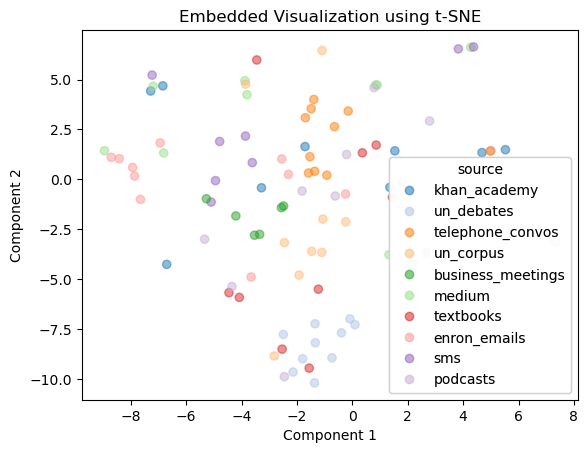

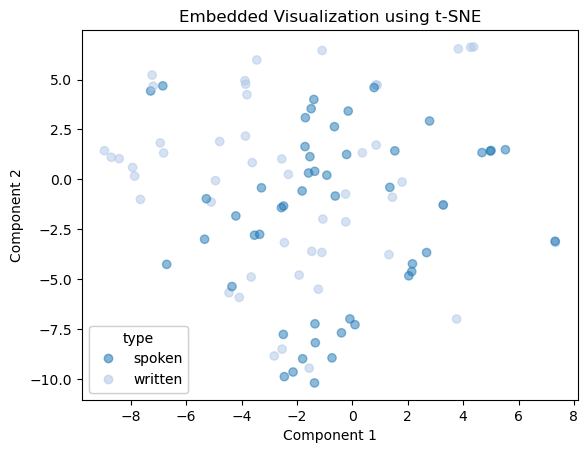

In [ ]:
plot_embeddings(embeddings, "source")
plot_embeddings(embeddings, "type")

### Baseline Classification Model ###


In [1]:
from datasets import load_dataset
full_dataset = load_dataset('csv', data_files= "final_dataset.csv")

/opt/anaconda3/envs/cs257_hw1/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 2843 examples [00:00, 11100.53 examples/s]


In [7]:
import pandas as pd
df = pd.read_csv("final_dataset.csv")
df = df.dropna()
df = df.rename(columns={"type": "label"})
df

,text,source,formality,label
0,delegation peru greatly pleased sir election p...,un_debates,formal,spoken
1,webvtt kind captions language en want video tr...,khan_academy,educational,spoken
2,congratulate mr president assuming responsible...,un_debates,formal,spoken
3,well called c chosen,telephone_convos,informal,spoken
4,regards janine cash vi confirmation request ka...,enron_emails,formal,written
...,...,...,...,...
2838,hi baby im sat bloody bus mo wont home wanna s...,sms,informal,written
2839,rents havent looked rents long time,telephone_convos,informal,spoken
2840,forgetting hurts knowing decision take sometim...,medium,semiformal,written
2841,created prototypes played friends encouraged t...,medium,semiformal,written


In [8]:
id2label = {0: "written", 1: "spoken"}
label2id = {"written": 0, "spoken": 1}
df["label"] = df["label"].map(label2id)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

#X = np.array(full_data)  # Your BERT embeddings
y = np.array(df['label'])     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       320
           1       0.99      0.86      0.92       248

    accuracy                           0.93       568
   macro avg       0.95      0.93      0.93       568
weighted avg       0.94      0.93      0.93       568

